In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from PIL import Image
from scipy.signal import convolve2d
from skimage.measure import block_reduce, find_contours
from matplotlib.patches import Rectangle
from kural_core.models import *
from kural_core.data_processing import *
import pickle
from scipy.io import loadmat


PATH = r'D:\Code\kural_work\\' 

In [2]:
data = loadmat(PATH + 'imgs_4_josh.mat')

In [3]:
imgs = data['imgs']

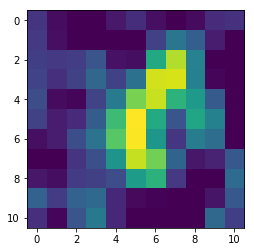

In [12]:
plt.imshow(imgs[0,0])

In [5]:
img = imgs[0,0]
img = img/np.max(img)
h = img.shape[0]
w = img.shape[1]
x,y = np.meshgrid(np.arange(w)-np.floor(w/2),np.arange(h)-np.floor(h/2))
img = torch.Tensor(img)
x = torch.Tensor(x)
y = torch.Tensor(y)

In [8]:
class StepEllipse(nn.Module):
    def __init__(self):
        super().__init__()
        self.A = nn.Parameter(torch.tensor([1.]))
        self.B = nn.Parameter(torch.tensor([0.]))
        self.cx = nn.Parameter(torch.tensor([0.]))
        self.cy = nn.Parameter(torch.tensor([0.]))
        self.rx = nn.Parameter(torch.tensor([5.]))
        self.ry = nn.Parameter(torch.tensor([5.]))
        self.th = nn.Parameter(np.pi*torch.rand(1))
    def forward(self,img):
        h = img.shape[0]
        w = img.shape[1]
        x,y = np.meshgrid(np.arange(w)-np.floor(w/2),np.arange(h)-np.floor(h/2))
        x = torch.Tensor(x)
        y = torch.Tensor(y)
        x0 = x-self.cx
        y0 = y-self.cy
        E = (x0*torch.cos(self.th)+y0*torch.sin(self.th))**2/self.rx**2 + \
            (x0*torch.sin(self.th)-y0*torch.cos(self.th))**2/self.ry**2 - 1
        S = self.A/(1+torch.exp(E)) + self.B
        return S

In [13]:
model = StepEllipse()
opt = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()
train_loss = []

In [25]:
for _ in range(1000):
    opt.zero_grad()
    y_pred = model(img)
    loss = criterion(y_pred,img)
    loss.backward()
    train_loss.append(loss.item())
    opt.step()

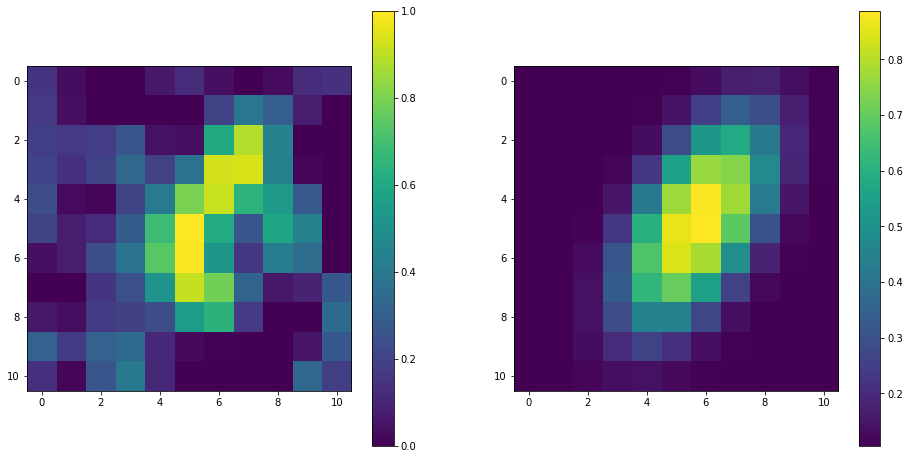

In [26]:
fig, ax = plt.subplots(1,2,figsize=[16,8])
mappable = ax[0].imshow(img)
plt.colorbar(mappable=mappable,ax=ax[0])
mappable = ax[1].imshow(model(img).data)
plt.colorbar(mappable=mappable,ax=ax[1])

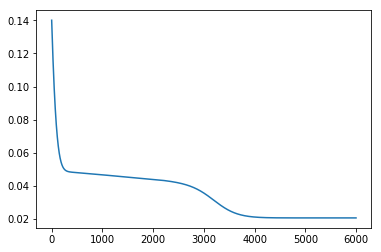

In [27]:
plt.plot(train_loss[0:])

In [157]:
model.cy

Parameter containing:
tensor([-0.2053], requires_grad=True)

In [58]:
model(img).data

tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])

In [87]:
torch.exp(torch.rand(1))

tensor([1.0057])